## Regression Trees

Regression tree is a class of non linear predictive models, which broadly comes under prediction trees along with it's better known cousin decision trees which are used for classifiaction. Our goal is to make predictions `Y` based on the input features `X1, X2, X3, ..., Xn`. The tree is grown by generating a binary decision tree which is obtained by splitting one particular feature `Xi` on that particular node. Depending on the evaluation on the splitting node the prediction proceeds either left or right. This process occurs recurssively until we reach the end or the leaf node. Predictions are made at the leaf node which are averages of all the instances which reach that particular leaf.

The motivation behind choosing this algorithm is usually it's simplicity and the ability to capture intricate interactions within the features. Linear and polynomial regression might perfectly fit within small segments within the data but thety might not generalize as well on the entire dataset. This is where decision trees prove to be useful.
Predictive trees are adaptive nearenst neighbours since they are not just similar as far as the input space is concerned but they are also similar within the responses. Another advantage is that unlike KNN where `k` is constant everywhere they can be skewed in any way they want which provides more flexibility and better predictions.

The general idea behind building optimal decision trees is is maximizing the information gain. Since it cannot be posed as a direct maximization problem a local greedy search at each level or node. This however requires the evaluation of a metric like information gain, misclassification rate or gini impurity which are defined for discrete variables. Within continuous variables for node m, representing a region $R_m$ with $N_m$ observations mean squared errors or the mean absolute error are employed which minimize the L2 and L1 errors respectively.

$c_m = \frac{1}{N_m}\sum yi $ 
- Mean squared error $H(X_m) = \frac{1}{N_m} \sum (y_i - c_m)^{2}$
- Mean absolute error $H(X_m) = \frac{1}{N_m} \sum |y_i - c_m|$

where $i \subset N_m $ and $X_m$ is the training data in node m

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [4]:
heating = pd.read_csv("heating_1.csv")

In [5]:
heating.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [6]:
from sklearn.model_selection import train_test_split
Y = heating['Y1']
X = heating.drop('Y1',axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [31]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth = 6)
clf = clf.fit(X_train, Y_train)

In [32]:
pred_test = clf.predict(X_test)
mse = np.mean((Y_test - pred_test)**2) 
print("RMSE on the test data")
print(np.sqrt(mse))

RMSE on the test data
0.553373945611


In [28]:
pred_train = clf.predict(X_train)
mse = np.mean((Y_train - pred_train)**2) 
print("RMSE on the train data")
print(np.sqrt(mse))

RMSE on the train data
1.43329176165e-16


There are many stopping criteria which can be used to prevent decision tree from growing to an extent that they overfit the data. The most commmon ones are stopping when the split isn't statistically significant or placing constraints on the minimum number of data points in the leaf nodes. Although these approaches work well there is always a chance of early stopping resulting in a sub optimal tree. The reason lies in information theory which can be illustrated by considering some features which aren't very informative themselves but they lead to meaningful splits down the line. The usual way to find the optimal depth is allowing the tree to grow to a certain depth and then pruning it back until the error stops decreasing. This ensures that the tree is expressive enough to generalize well without overfitting or underfitting. 

In [49]:
train_plot = []
test_plot = []
for i in range(3,10):
    clf = tree.DecisionTreeRegressor(max_depth = i)
    clf = clf.fit(X_train, Y_train)
    pred_test = clf.predict(X_test)
    test_plot.append(np.mean((Y_test - pred_test)**2)) 
    pred_train = clf.predict(X_train)
    train_plot.append(np.mean((Y_train - pred_train)**2)) 

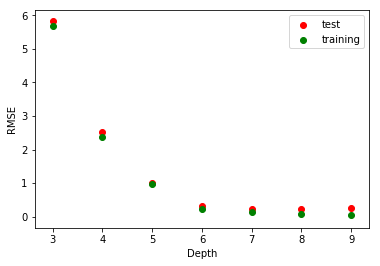

In [55]:
plt.figure()
plt.scatter(np.linspace(3,9, 7), test_plot, c = 'red', label = 'test')
plt.scatter(np.linspace(3,9, 7), train_plot, c = 'green', label = 'training')
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()
#np.linspace(1, 20, 20)


In [56]:
test_plot

[5.839713097387098,
 2.5320982927712143,
 0.9899489963322893,
 0.30622272368146014,
 0.23067004356361162,
 0.23422199580453962,
 0.24609460491366672]

In [58]:
Y = np.log(heating['Y1'].values)
X_train, X_test, Y_train_trans, Y_test_trans = train_test_split(X,Y)
clf = clf.fit(X_train, Y_train_trans)

In [61]:
pred_test = clf.predict(X_test)
mse = np.mean((Y_test_trans - pred_test)**2) 
print("RMSE on the test data")
print(np.sqrt(mse))

RMSE on the test data
0.0221791344887


In [62]:
pred_train = clf.predict(X_train)
mse = np.mean((Y_train_trans - pred_train)**2) 
print("RMSE on the train data")
print(np.sqrt(mse))

RMSE on the train data
0.0074477269626


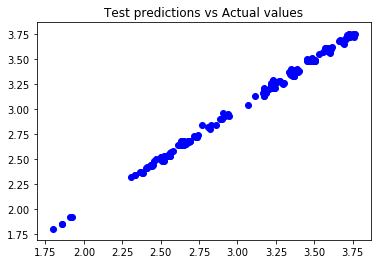

In [71]:
plt.scatter(Y_test_trans, pred_test, c = 'blue')
plt.title('Test predictions vs Actual values')
plt.show()

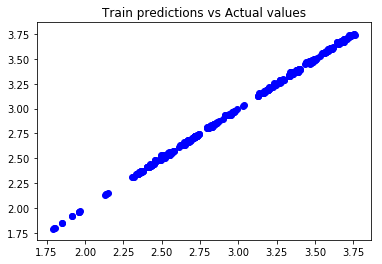

In [70]:
plt.scatter(Y_train_trans, pred_train, c = 'blue')
plt.title('Train predictions vs Actual values')
plt.show()

Referances:
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011
L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984.